In [44]:
from langchain_groq import ChatGroq
from dotenv import load_dotenv
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [ ]:
load_dotenv()
model = ChatGroq(model="qwen-qwq-32b")

True

In [47]:
class BlogState(TypedDict):
    title: str
    outline:str
    content :str

In [48]:
def create_outline(state: BlogState) -> BlogState:
    title = state['title']
    
    prompt = f"Generate a detailed outline for a blog on the topic - {title}"
    
    outline = model.invoke(prompt).content
    
    state['outline'] = outline
    
    return state


def gen_blog(state: BlogState) -> BlogState:
    
    title = state['title']
    outline = state['outline']
    
    prompt = f"write a detiled blog om the - {title} using following outline \n {outline}"
    
    content = model.invoke(prompt).content
    state['content'] = content
    
    return state
    

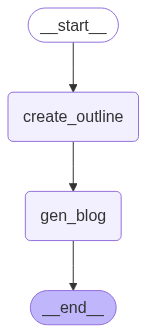

In [49]:
graph = StateGraph(BlogState)
graph.add_node("create_outline",create_outline)
graph.add_node("gen_blog",gen_blog)

graph.add_edge(START, "create_outline")
graph.add_edge("create_outline","gen_blog")
graph.add_edge("gen_blog", END)

workflow = graph.compile()
workflow

In [50]:
intial_state = {'title': 'Rise of AI in India'}

final_state = workflow.invoke(intial_state)

print(final_state)


{'title': 'Rise of AI in India', 'outline': '\n<think>\nOkay, I need to create a detailed outline for a blog about the rise of AI in India. Let me start by thinking about the key points I should cover. First, maybe an introduction to set the context. The user mentioned a title, so I should come up with a catchy one. The introduction should probably talk about how AI is transforming industries and mention India\'s role in this.\n\nNext, the historical context. I should start from the early days of AI in India. When did AI really start here? Maybe late 20th century with some research institutes. Then mention key milestones, like when the government started taking notice. I remember NITI Aayog\'s 2018 report on AI, that\'s important. Also, the National AI strategy from 2019, and the成立的AI task forces. That covers the historical part.\n\nThen, current developments. What\'s happening now? Maybe sectors like healthcare, agriculture, fintech, and smart cities. For each of these, examples would

In [ ]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_core.prompts import PromptTemplate
from dotenv import load_dotenv
from langchain_groq import ChatGroq

In [40]:
load_dotenv()
model = ChatGroq(model="meta-llama/llama-4-scout-17b-16e-instruct")

In [54]:
class BlogState(TypedDict):
    title: str
    outline:str
    content:str
    score: str

In [ ]:
def create_outline(state: BlogState):
    title = state['title']
    prompt = PromptTemplate(template="write a detailed outline of the topic - {title}", input_variables=["title"])
    formated_propmpt = prompt.format(title=title)
    result = model.invoke(formated_propmpt).content
    state["outline"] = result
    return state 

def create_blog(state: BlogState):
    title = state['title']
    outline = state['outline']
    prompt = PromptTemplate(template="write a detailed blog on the - {title} using following outline \n {outline}",
                            input_variables=["title","outline"])
    formated_prompt = prompt.format(title=title, outline=outline)
    content = model.invoke(formated_prompt).content
    state["content"]=content
    return state

def evaluate_blog(state:BlogState):
    title = state["title"]
    outline = state["outline"]
    content = state["content"]
    prompt = PromptTemplate(template=(
                        "You are an expert blog reviewer. Based on the following:\n"
                        "Title: {title}\n\n"
                        "Outline: {outline}\n\n"
                        "Content: {content}\n\n"
                        "Rate this blog post from 0 to 10. write only numbers out of 10 in this format 8/10 not any other things"

                    ),input_variables=["title", "outline", "content"]  )
    formated_propmt = prompt.format(title=title, outline=outline, content=content)
    score = model.invoke(formated_propmt).content.strip()
    state["score"] = score
    return state
    

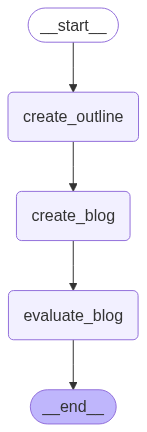

In [64]:
graph = StateGraph(BlogState)
graph.add_node("create_outline",create_outline)
graph.add_node("create_blog",create_blog)
graph.add_node("evaluate_blog",evaluate_blog)

graph.add_edge(START, "create_outline")
graph.add_edge("create_outline","create_blog")
graph.add_edge("create_blog","evaluate_blog")
graph.add_edge("evaluate_blog", END)

worflow = graph.compile()
worflow

In [67]:
intial_state = {'title':'Best Mutual Fund in 2025'}

final_state = worflow.invoke(intial_state)
# print(final_state["title"])
# print(final_state["outline"])
# print(final_state["content"])
print(final_state["score"])

8/10
